In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sym
import warnings

from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt
from scipy.constants import c
from scipy.constants import value
from numpy.random import normal

from optic.dsp import firFilter, pulseShape,  lowPassFIR
from optic.models import mzm
from optic.plot import eyediagram
from commpy.utilities  import signal_power, upsample

# Pulso super-gaussiano

### Pulso Gaussiano
$$ A(t) = e^{-\frac{1}{2}(\frac{t}{T_{0}})^2} $$

### Pulso Gaussiano com Chirp
$$ A(t) = e^{-\frac{1}{2}(\frac{t}{T_{0}})^2} \cdot e^{-jC\frac{1}{2}(\frac{t}{T_{0}})^2} = e^{-\frac{1+jC}{2}(\frac{t}{T_{0}})^2}$$

### Pulso Super-Gaussiano
$$ A(t) = e^{-\frac{1}{2}(\frac{t}{T_{0}})^{2m}} \cdot e^{-jC\frac{1}{2}(\frac{t}{T_{0}})^{2m}} = e^{-\frac{1+jC}{2}(\frac{t}{T_{0}})^{2m}}$$

In [2]:
fs = 400  # Sample frequency
fftSize = 2**12 # FFT Size

def supergauss(t,T0,C,m):
    return np.exp( -1*(1+1j*C)/2 * (t/T0)**(2*m))

(-20.0, 20.0)

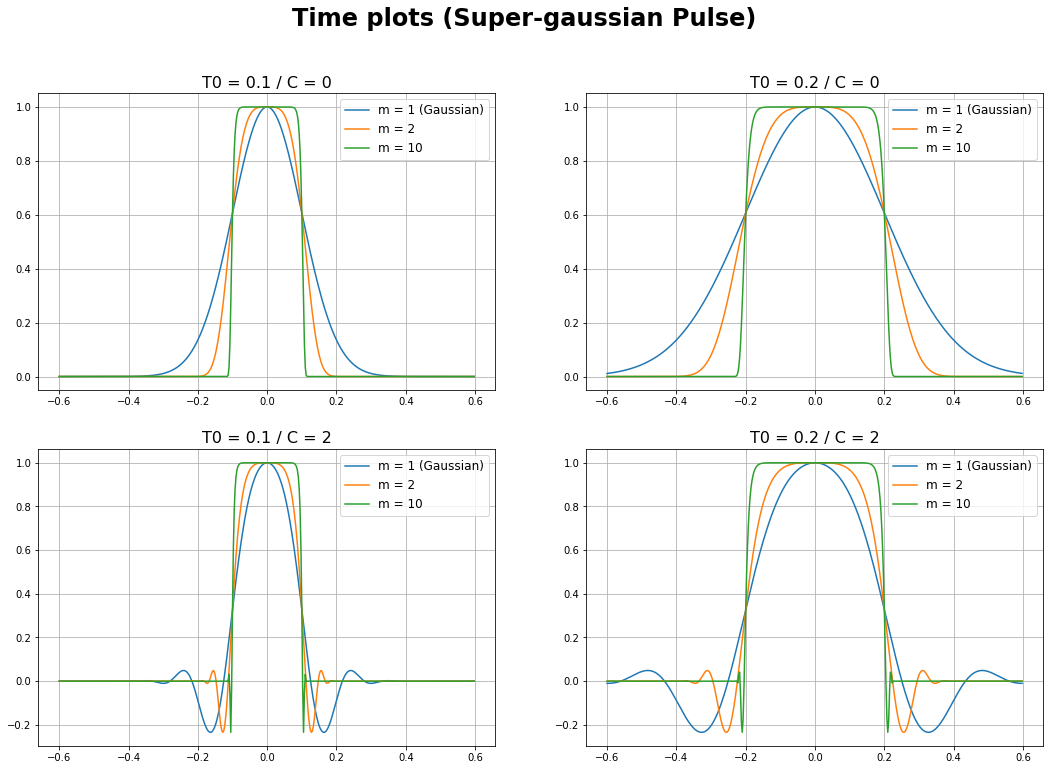

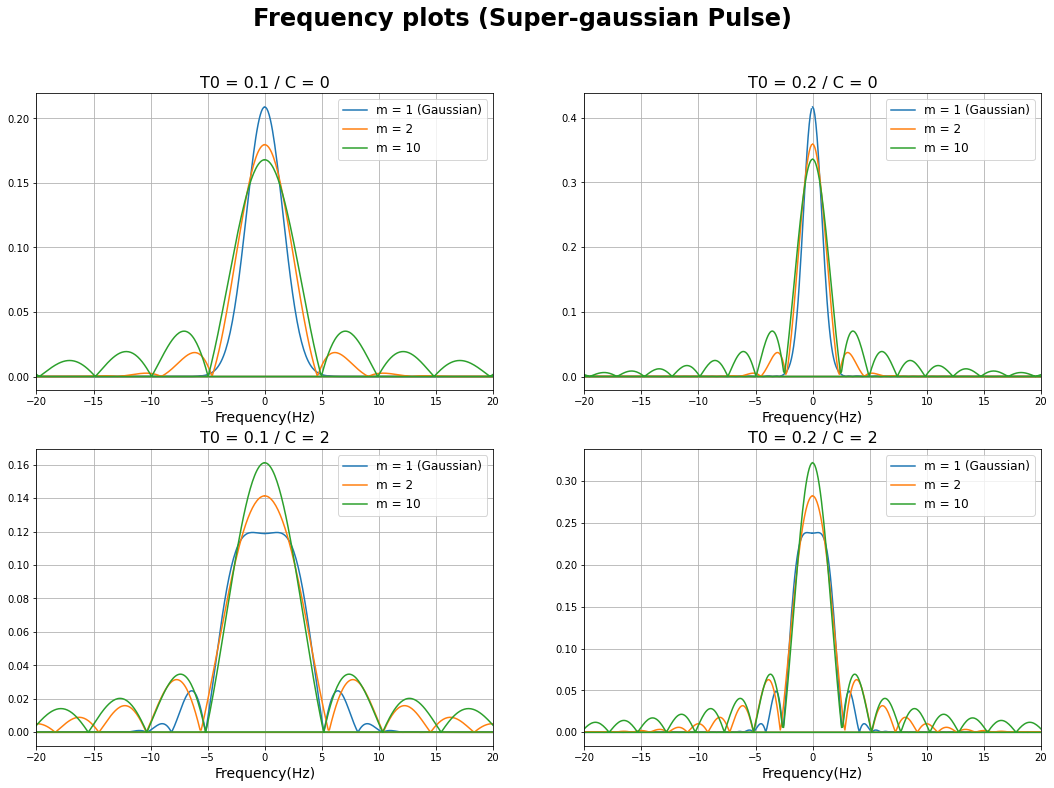

In [89]:
xArray = np.arange(-0.6,0.6,1/fs)

# Time plots ---------------------------------------------------------------------------------------

figure, ax = plt.subplots(2,2,figsize=(18,12))
figure.suptitle("Time plots (Super-gaussian Pulse)", fontsize=24, fontweight="bold")
ax[0][0].plot(xArray,np.real(supergauss(xArray,0.1,0,1)), label='m = 1 (Gaussian)')
ax[0][0].plot(xArray,np.real(supergauss(xArray,0.1,0,2)), label='m = 2')
ax[0][0].plot(xArray,np.real(supergauss(xArray,0.1,0,10)), label='m = 10')
ax[0][0].grid(True)
ax[0][0].legend(fontsize=12)
ax[0][0].set_title('T0 = 0.1 / C = 0', fontsize=16)

ax[0][1].plot(xArray,np.real(supergauss(xArray,0.2,0,1)), label='m = 1 (Gaussian)')
ax[0][1].plot(xArray,np.real(supergauss(xArray,0.2,0,2)), label='m = 2')
ax[0][1].plot(xArray,np.real(supergauss(xArray,0.2,0,10)), label='m = 10')
ax[0][1].grid(True)
ax[0][1].legend(fontsize=12)
ax[0][1].set_title('T0 = 0.2 / C = 0', fontsize=16)

ax[1][0].plot(xArray,np.real(supergauss(xArray,0.1,2,1)), label='m = 1 (Gaussian)')
ax[1][0].plot(xArray,np.real(supergauss(xArray,0.1,2,2)), label='m = 2')
ax[1][0].plot(xArray,np.real(supergauss(xArray,0.1,2,10)), label='m = 10')
ax[1][0].grid(True)
ax[1][0].legend(fontsize=12)
ax[1][0].set_title('T0 = 0.1 / C = 2', fontsize=16)

ax[1][1].plot(xArray,np.real(supergauss(xArray,0.2,2,1)), label='m = 1 (Gaussian)')
ax[1][1].plot(xArray,np.real(supergauss(xArray,0.2,2,2)), label='m = 2')
ax[1][1].plot(xArray,np.real(supergauss(xArray,0.2,2,10)), label='m = 10')
ax[1][1].grid(True)
ax[1][1].legend(fontsize=12)
ax[1][1].set_title('T0 = 0.2 / C = 2', fontsize=16)

# Frequency plots ---------------------------------------------------------------------------------------

figure, ax = plt.subplots(2,2,figsize=(18,12))
figure.suptitle("Frequency plots (Super-gaussian Pulse)", fontsize=24, fontweight="bold")
freq = np.fft.fftfreq(fftSize)*fs

ax[0][0].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.1,0,1)),fftSize))/len(xArray), label='m = 1 (Gaussian)')
ax[0][0].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.1,0,2)),fftSize))/len(xArray), label='m = 2')
ax[0][0].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.1,0,10)),fftSize))/len(xArray), label='m = 10')
ax[0][0].grid(True)
ax[0][0].legend(fontsize=12)
ax[0][0].set_title('T0 = 0.1 / C = 0', fontsize=16)
ax[0][0].set_xlabel('Frequency(Hz)', fontsize=14)
ax[0][0].set_xlim(-20,20)

ax[0][1].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.2,0,1)),fftSize))/len(xArray), label='m = 1 (Gaussian)')
ax[0][1].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.2,0,2)),fftSize))/len(xArray), label='m = 2')
ax[0][1].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.2,0,10)),fftSize))/len(xArray), label='m = 10')
ax[0][1].grid(True)
ax[0][1].legend(fontsize=12)
ax[0][1].set_title('T0 = 0.2 / C = 0', fontsize=16)
ax[0][1].set_xlabel('Frequency(Hz)', fontsize=14)
ax[0][1].set_xlim(-20,20)

ax[1][0].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.1,2,1)),fftSize))/len(xArray), label='m = 1 (Gaussian)')
ax[1][0].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.1,2,2)),fftSize))/len(xArray), label='m = 2')
ax[1][0].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.1,2,10)),fftSize))/len(xArray), label='m = 10')
ax[1][0].grid(True)
ax[1][0].legend(fontsize=12)
ax[1][0].set_title('T0 = 0.1 / C = 2', fontsize=16)
ax[1][0].set_xlabel('Frequency(Hz)', fontsize=14)
ax[1][0].set_xlim(-20,20)

ax[1][1].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.2,2,1)),fftSize))/len(xArray), label='m = 1 (Gaussian)')
ax[1][1].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.2,2,2)),fftSize))/len(xArray), label='m = 2')
ax[1][1].plot(freq, np.abs(np.fft.fft(np.real(supergauss(xArray,0.2,2,10)),fftSize))/len(xArray), label='m = 10')
ax[1][1].grid(True)
ax[1][1].legend(fontsize=12)
ax[1][1].set_title('T0 = 0.2 / C = 2', fontsize=16)
ax[1][1].set_xlabel('Frequency(Hz)', fontsize=14)
ax[1][1].set_xlim(-20,20)

# Transmissão 10G OOK apenas com dispersão

## Parametros

In [3]:
# parâmetros da simulação
SpS = 32
Rs     = 10e9          # Taxa de símbolos (para o caso do OOK Rs = Rb)
Ts     = 1/Rs          # Período de símbolo em segundos
Fa     = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta     = 1/Fa          # Período de amostragem
lmbd   = 1550e-9       # comprimento de onda
Pi_dBm = 0             # potência de sinal óptico na entrada do modulador em dBm

# Parâmetros do MZM
Vπ = 2
Vb = -Vπ/2
Pi = 10**(Pi_dBm/10)*1e-3 # potência de sinal óptico em W na entrada do MZM

# Parâmetros da fibra
D = 18e-6                        # Parâmetro de dispersão ps/(nm*km) - SMF28
beta2 = -(D*lmbd**2)/(2*np.pi*c) # GVD
z = 70e3                         # Comprimento do enlace

# Parâmetros do receptor
Rd  = 0.85      # responsividade em A/W

LD = (Ts**2)/abs(beta2)
print('Comprimento de dispersão [m]: %f' %(LD))

Comprimento de dispersão [m]: 435576.729636


## Transmissão

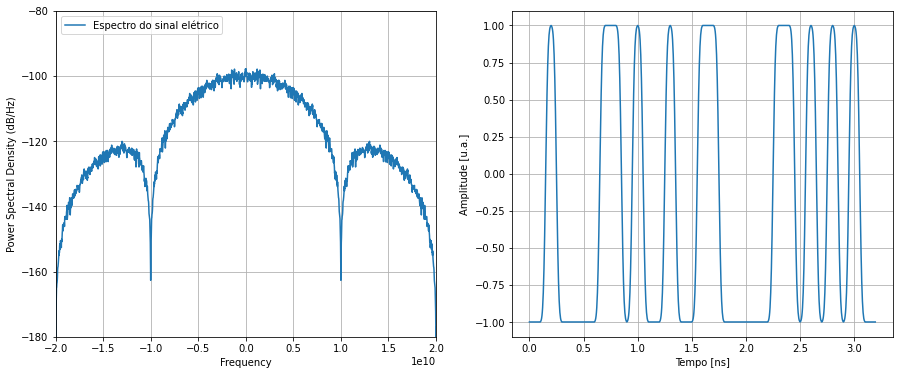

In [12]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=10000)    
n      = np.arange(0, bits.size)

# mapeia bits para pulsos elétricos
symbTx = 2*bits-1
symbTx = symbTx/np.sqrt(signal_power(symbTx))

# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))
# plt.figure(figsize=(10,6))
# plt.plot(np.arange(0,len(pulse)),pulse)
# print(len(pulse))
# print(pulse)

# plota sinal 
t = np.arange(0, symbTx.size)*(Ta/1e-9)

#idX = np.arange(0,513)
idX = np.arange(0,1023)

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)

# plota psd
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].set_xlim(-2*Rs,2*Rs);
axs[0].set_ylim(-180,-80);
axs[0].psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal elétrico')
axs[0].legend(loc='upper left')

axs[1].plot(t[idX], sigTx[idX].real)
axs[1].set_xlabel('Tempo [ns]')
axs[1].set_ylabel('Amplitude [u.a.]')
axs[1].grid(True)

## Modulação

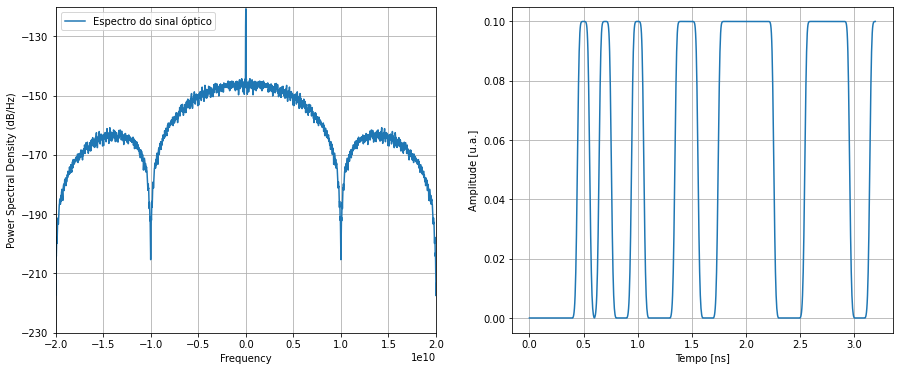

In [99]:
# modulação óptica
Ai = np.sqrt(Pi)*np.ones(len(sigTx))
sigTxo = mzm(Ai, sigTx, Vπ, Vb)

# plota psd
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].set_xlim(-2*Rs,2*Rs);
axs[0].set_ylim(-230,-120);
axs[0].psd(np.abs(sigTxo)**2,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico')
axs[0].legend(loc='upper left')

axs[1].plot(t[idX], np.abs(sigTxo[idX]))
axs[1].set_xlabel('Tempo [ns]')
axs[1].set_ylabel('Amplitude [u.a.]')
axs[1].grid(True)

## Fibra óptica

In [ ]:
# transmissão óptica
NFFT = len(sigTxo)
sigTxoFFT = np.fft.fftshift(np.fft.fft(sigTxo))/NFFT
sigTxoPx  = np.abs(sigTxoFFT)**2
freq = np.fft.fftshift(np.fft.fftfreq(len(sigTxoFFT), Ta))

# Fibra óptica
H  = np.exp(1j*0.5*beta2*z*(2*np.pi*freq)**2) # Função de transferência do canal
sigRxoFFT = H * sigTxoFFT
sigRxoPx  = np.abs(sigRxoFFT)**2
sigRxo = np.fft.ifft(sigRxoFFT)*NFFT

## Recepção

Potência do sinal (em dBm) = 6.99 dBm


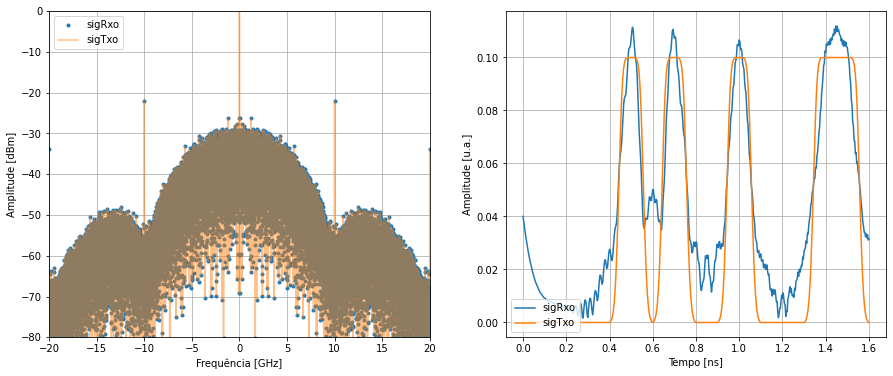

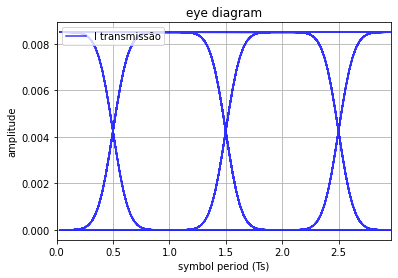

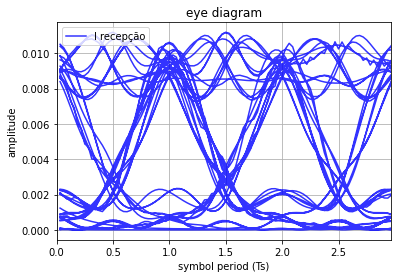

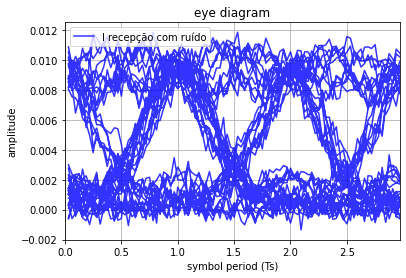

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].plot(1e-9*freq, 10*np.log10(1e3*sigRxoPx), '.', label = 'sigRxo')
axs[0].plot(1e-9*freq, 10*np.log10(1e3*sigTxoPx), alpha = 0.5, label = 'sigTxo')
axs[0].set_ylabel('Amplitude [dBm]')
axs[0].set_xlabel('Frequência [GHz]')
axs[0].set_xlim(-2e-9*Rs,2e-9*Rs)
axs[0].set_ylim(-80,0)
axs[0].grid(True)
axs[0].legend(loc = 'upper left')

axs[1].plot(t[0:513], abs(sigRxo[0:513]), label = 'sigRxo')
axs[1].plot(t[0:513], abs(sigTxo[0:513]), label = 'sigTxo')
axs[1].set_xlabel('Tempo [ns]')
axs[1].set_ylabel('Amplitude [u.a.]')
axs[1].grid(True)
axs[1].legend(loc = 'lower left')

print('Potência do sinal (em dBm) = %.2f dBm' %(10*np.log10(np.sum(sigTxoPx)/1e-3)))

# Recepção do sinal óptico
Nsamples = 2**12

# fotocorrente livre de ruído
Ip   = Rd*np.abs(sigTxo)**2
I_Rx = Rd*np.abs(sigRxo)**2

# fotocorrente com ruído gaussiano
NoiseIs = 16 # Corrente proveniente de ruido (A)
Band = 40e9 # Banda do fotodiodo
q  = value('elementary charge')
Is  = normal(0, np.sqrt(2*q*NoiseIs*Band), len(I_Rx))
I_Rx2 = I_Rx+Is

# diagrama de olho
eyediagram(Ip,  Nsamples, SpS, plotlabel='I transmissão')
eyediagram(I_Rx, Nsamples, SpS, plotlabel='I recepção')
eyediagram(I_Rx2, Nsamples, SpS, plotlabel='I recepção com ruído')

# Transmissão 10G OOK apenas com dispersão, com compensador

Modelo: SMFDK-S-070-03-10

Compensasão de uma SMF de 70km. Escolha do cabo de 3mm para redução de efeitos não-lineares. Uso de conectores FC/APC por conta de sua estabilidade a vibrações e eficiência contra Return Loss. Caixa do DCF padrão

## Parametros

In [67]:
# parâmetros da simulação
SpS = 32
Rs     = 10e9          # Taxa de símbolos (para o caso do OOK Rs = Rb)
Ts     = 1/Rs          # Período de símbolo em segundos
Fa     = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta     = 1/Fa          # Período de amostragem
lmbd   = 1550e-9       # comprimento de onda
Pi_dBm = 0             # potência de sinal óptico na entrada do modulador em dBm

# Parâmetros do MZM
Vπ = 2
Vb = -Vπ/2
Pi = 10**(Pi_dBm/10)*1e-3 # potência de sinal óptico em W na entrada do MZM

# Parâmetros da fibra
D = 18e-6                        # Parâmetro de dispersão ps/(nm*km) - SMF28
beta2 = -(D*lmbd**2)/(2*np.pi*c) # GVD
z = 70e3                         # Comprimento do enlace (m)

# Parâmetros do compensador
NomD = -1190e-6                   # Dispersão nominal ps/(nm)
z2 = 70e3                         # Comprimento a ser compensado (m)
Dcom = 1e3*NomD/z
beta2com = -(Dcom*lmbd**2)/(2*np.pi*c) # GVD

# Parâmetros do receptor
Rd  = 0.85      # responsividade em A/W

display(Math('D_{SMF} = %5.2f~ps/nm/km ~~~~~~~~~~~~~~~~~~~~~ D_{DSCM} = %5.2f~ps/nm/km' %(1e6*D,1e6*Dcom)))
display(Math('NominalD_{SMF} = %5.2f~ps/nm ~~~~~~~~ NominalD_{DSCM} = %5.2f~ps/nm' %(1e3*D*z2,1e6*NomD)))
display(Math('RD = %5.2f~ps/nm/km' %(1e3*D*z + 1e6*NomD)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Transmissão e Modulação

In [73]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=10000)    
n      = np.arange(0, bits.size)

# mapeia bits para pulsos elétricos
symbTx = 2*bits-1
symbTx = symbTx/np.sqrt(signal_power(symbTx))

# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# plota sinal 
t = np.arange(0, symbTx.size)*(Ta/1e-9)

#idX = np.arange(0,513)
idX = np.arange(0,1023)

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)

# modulação óptica
Ai = np.sqrt(Pi)*np.ones(len(sigTx))
sigTxo = mzm(Ai, sigTx, Vπ, Vb)


## Fibra óptica

In [75]:
# transmissão óptica
NFFT = len(sigTxo)
sigTxoFFT = np.fft.fftshift(np.fft.fft(sigTxo))/NFFT
sigTxoPx  = np.abs(sigTxoFFT)**2
freq = np.fft.fftshift(np.fft.fftfreq(len(sigTxoFFT), Ta))

# Fibra óptica
H  = np.exp(1j*0.5*beta2*z*(2*np.pi*freq)**2) # Função de transferência do canal
sigRxoFFT = H * sigTxoFFT
sigRxoPx  = np.abs(sigRxoFFT)**2
sigRxo = np.fft.ifft(sigRxoFFT)*NFFT

Hcom  = np.exp(1j*0.5*beta2com*z2*(2*np.pi*freq)**2) # Função de transferência do DCF
sigRxoFFTcom = H * sigTxoFFT * Hcom
sigRxoPxcom  = np.abs(sigRxoFFTcom)**2
sigRxocom = np.fft.ifft(sigRxoFFTcom)*NFFT

## Recepção

Potência do sinal (em dBm) = -3.04 dBm


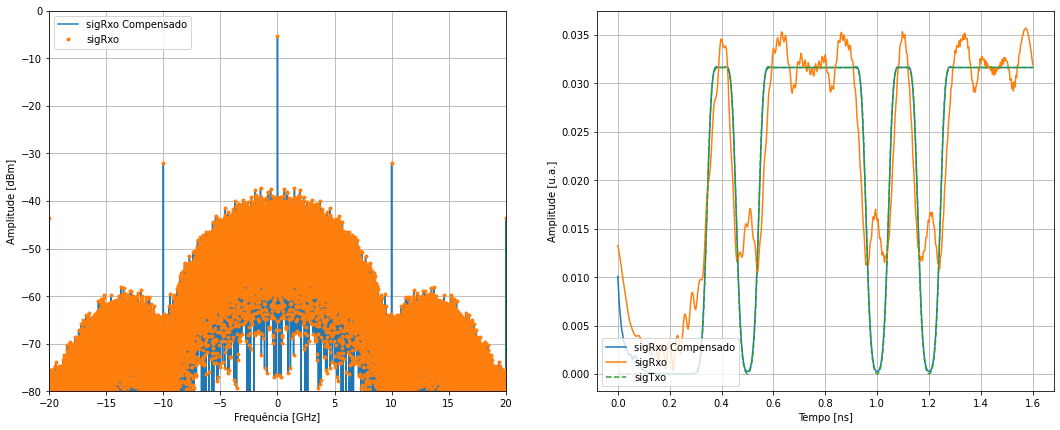

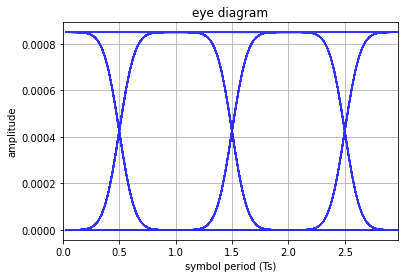

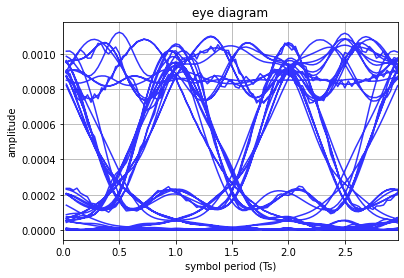

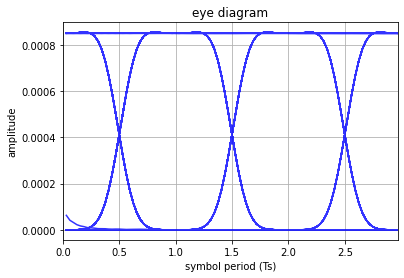

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))
axs[0].plot(1e-9*freq, 10*np.log10(1e3*sigRxoPxcom), '-', label = 'sigRxo Compensado')
axs[0].plot(1e-9*freq, 10*np.log10(1e3*sigRxoPx), '.', label = 'sigRxo')
axs[0].set_ylabel('Amplitude [dBm]')
axs[0].set_xlabel('Frequência [GHz]')
axs[0].set_xlim(-2e-9*Rs,2e-9*Rs)
axs[0].set_ylim(-80,0)
axs[0].grid(True)
axs[0].legend(loc = 'upper left')

axs[1].plot(t[0:513], abs(sigRxocom[0:513]), label = 'sigRxo Compensado')
axs[1].plot(t[0:513], abs(sigRxo[0:513]), label = 'sigRxo')
axs[1].plot(t[0:513], abs(sigTxo[0:513]), '--', label = 'sigTxo')
axs[1].set_xlabel('Tempo [ns]')
axs[1].set_ylabel('Amplitude [u.a.]')
axs[1].grid(True)
axs[1].legend(loc = 'lower left')

print('Potência do sinal (em dBm) = %.2f dBm' %(10*np.log10(np.sum(sigTxoPx)/1e-3)))

# Recepção do sinal óptico
Nsamples = 2**12

# fotocorrente livre de ruído
Ip   = Rd*np.abs(sigTxo)**2
I_Rx = Rd*np.abs(sigRxo)**2
I_Rxcom = Rd*np.abs(sigRxocom)**2

# diagrama de olho
eyediagram(Ip,  Nsamples, SpS)
eyediagram(I_Rx, Nsamples, SpS)
eyediagram(I_Rxcom, Nsamples, SpS)